# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Abdul Wasiul Khair
- **Email:** gamerough7@gmail.com
- **ID Dicoding:** gamerough

## Menentukan Pertanyaan Bisnis

- Apakah hari kerja berpengaruh terhadap jumlah orang yang merental sepeda perhari
- Apakah cuaca berpengaruh terhadap jumlah orang yang merental sepeda perhari

## Import Semua Packages/Library yang Digunakan

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter #untuk menghilangkan format angka

## Data Wrangling

### Gathering Data

In [73]:
day_df = pd.read_csv("Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Saya akan menganalisis dataset day.csv karena ingin mengecek pengaruh hari kerja dan juga cuaca pada hari tersebut terhadap jumlah perental sepeda.

### Assessing Data

In [74]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Disini diketahui tidak terdapat perbedaan jumlah baris.

In [75]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [76]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Dataset tidak memiliki data kosong dan juga tidak memiliki data duplikat. Selanjutnya akan dilakukan pengecekan terhadap outlier.

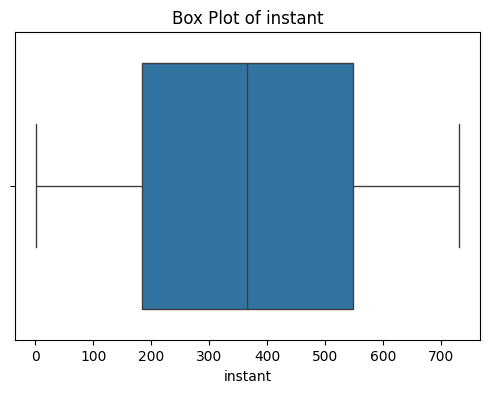

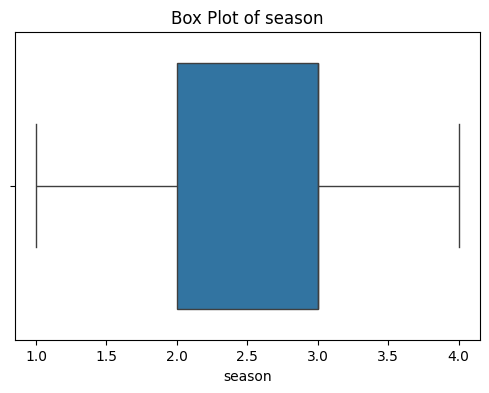

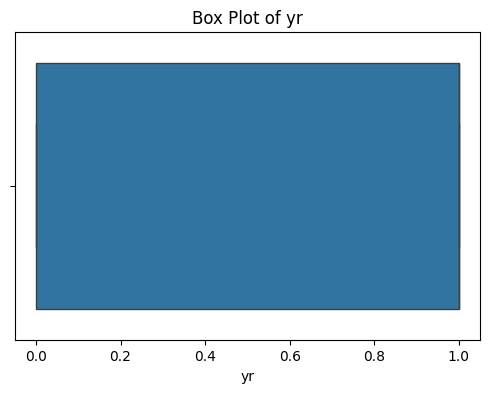

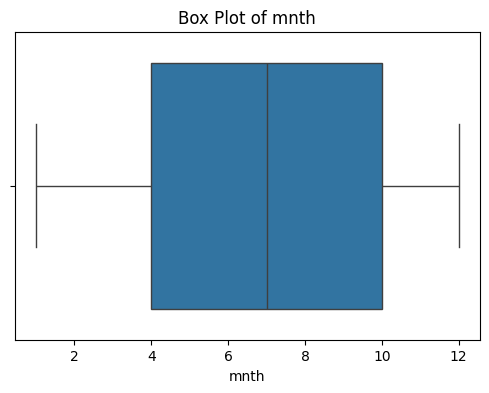

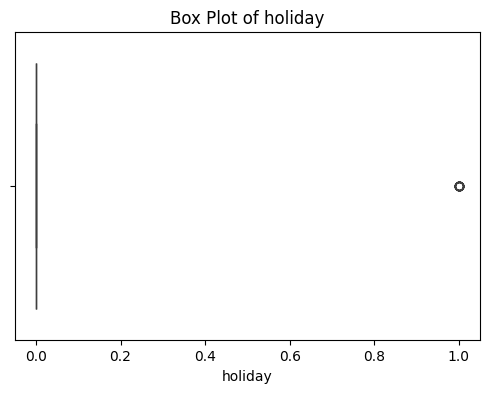

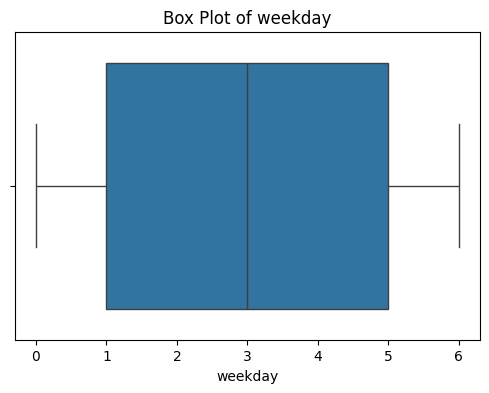

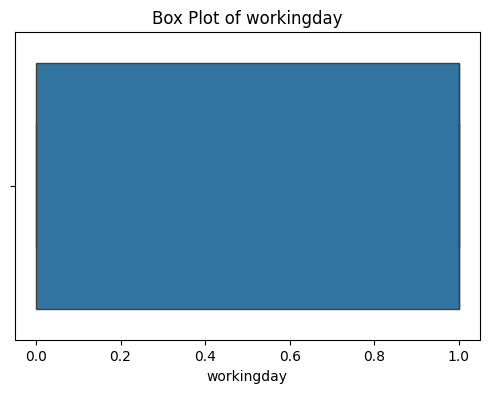

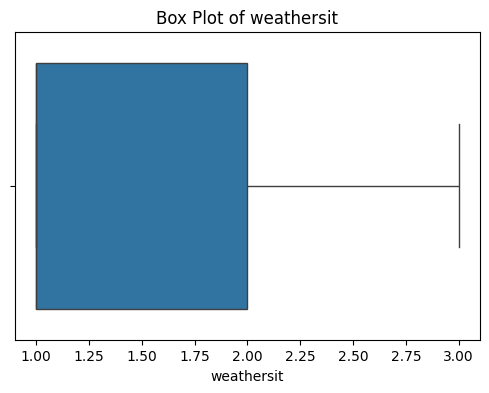

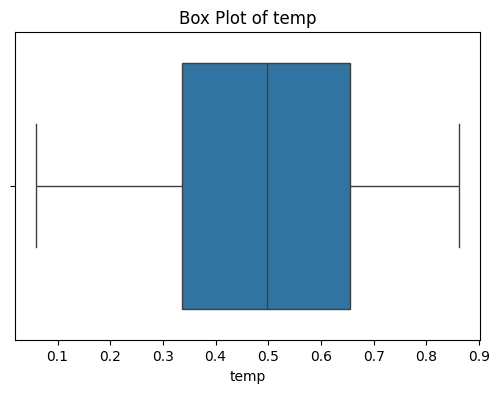

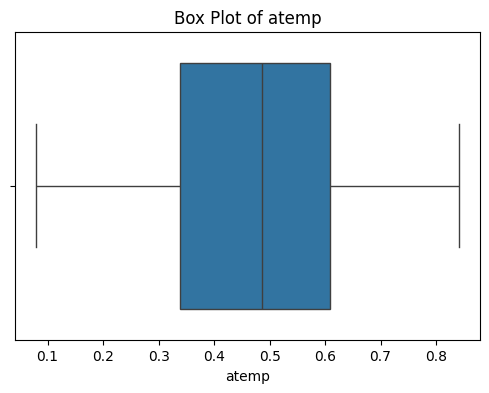

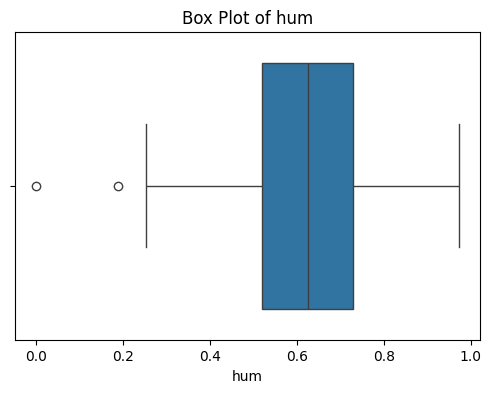

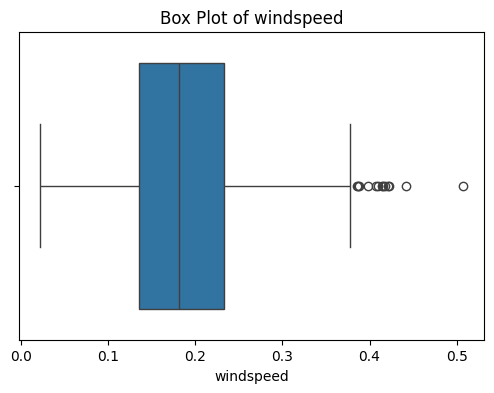

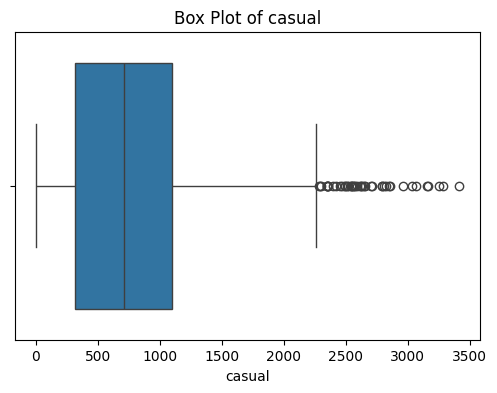

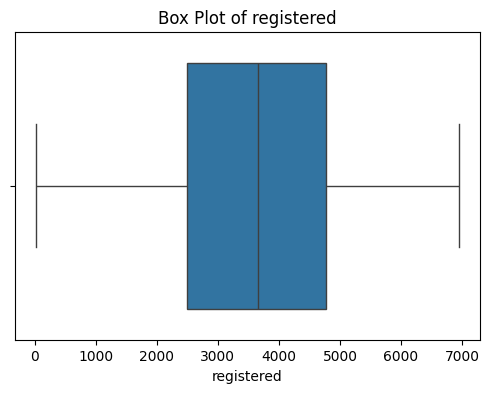

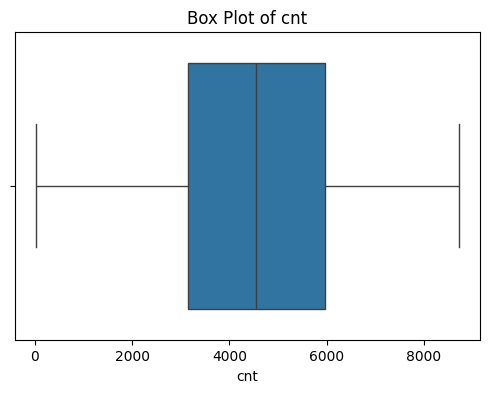

In [77]:
# Tentukan kolom-kolom numerik untuk dianalisis
numeric_columns = day_df.select_dtypes(include=['number']).columns

# Menampilkan box plot untuk setiap kolom numerik secara terpisah
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=day_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

Dapat dilihat terdapat outlier pada dataset. Pada tahap data cleaning, outlier tersebut akan dihilangkan.

### Cleaning Data

Disini outlier dari dataset akan coba diganti dengan median, metode yang digunakan adalah z-score. Disini kolom holiday akan dikecualikan agar data dari holiday tidak hilang.

In [78]:
# Tentukan kolom-kolom numerik untuk dianalisis
numeric_columns = day_df.select_dtypes(include=['number']).columns

# Batasi nilai z-score yang dianggap sebagai outlier (misal, 3 standar deviasi)
z_score_limit = 3

# Menghilangkan outlier dengan z-score dan mengganti dengan nilai median
for column in numeric_columns:
    # Kecuali kolom 'holiday'
    if column != 'holiday':
        z_scores = np.abs((day_df[column] - day_df[column].mean()) / day_df[column].std())
        day_df[column] = np.where(z_scores < z_score_limit, day_df[column], day_df[column].median())


# Tampilkan DataFrame setelah menghilangkan outlier dan mengganti dengan median
print(day_df)

     instant      dteday  season   yr  mnth  holiday  weekday  workingday  \
0        1.0  2011-01-01     1.0  0.0   1.0        0      6.0         0.0   
1        2.0  2011-01-02     1.0  0.0   1.0        0      0.0         0.0   
2        3.0  2011-01-03     1.0  0.0   1.0        0      1.0         1.0   
3        4.0  2011-01-04     1.0  0.0   1.0        0      2.0         1.0   
4        5.0  2011-01-05     1.0  0.0   1.0        0      3.0         1.0   
..       ...         ...     ...  ...   ...      ...      ...         ...   
726    727.0  2012-12-27     1.0  1.0  12.0        0      4.0         1.0   
727    728.0  2012-12-28     1.0  1.0  12.0        0      5.0         1.0   
728    729.0  2012-12-29     1.0  1.0  12.0        0      6.0         0.0   
729    730.0  2012-12-30     1.0  1.0  12.0        0      0.0         0.0   
730    731.0  2012-12-31     1.0  1.0  12.0        0      1.0         1.0   

     weathersit      temp     atemp       hum  windspeed  casual  registere

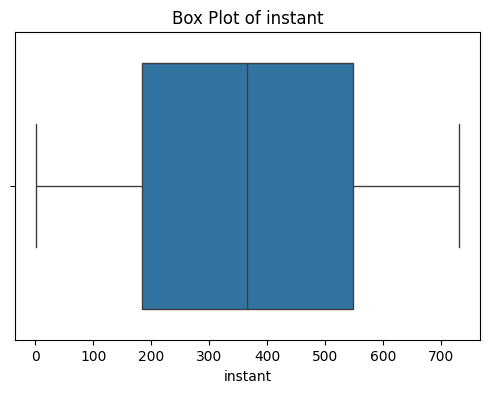

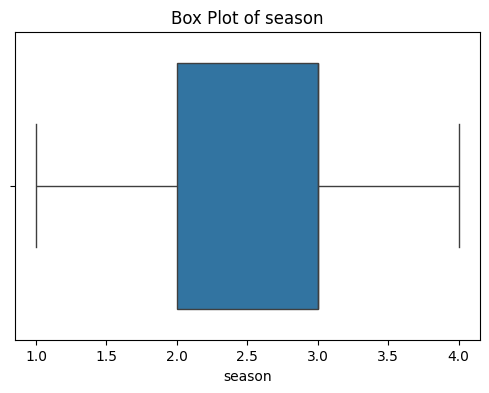

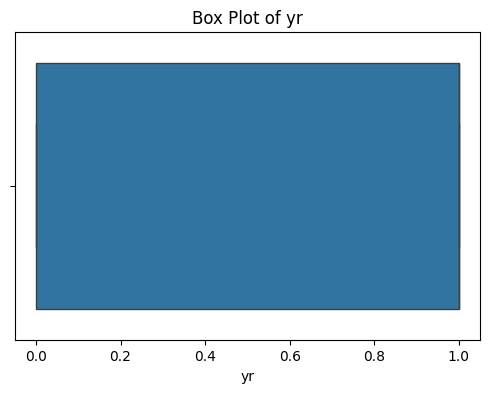

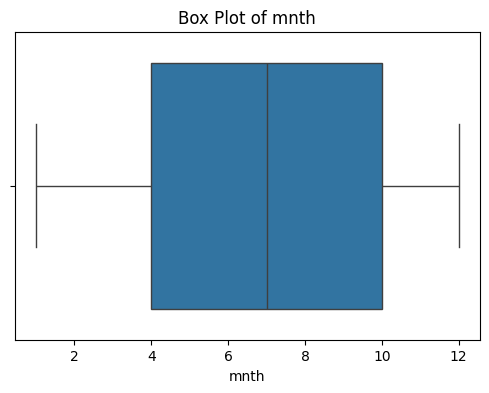

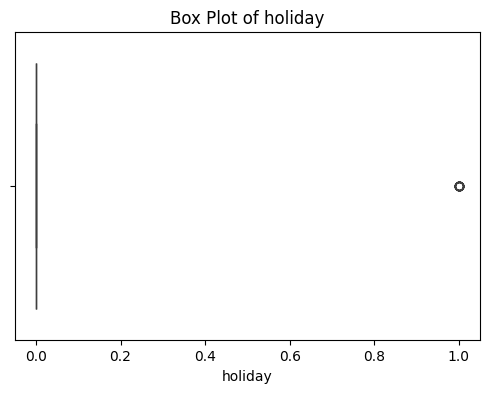

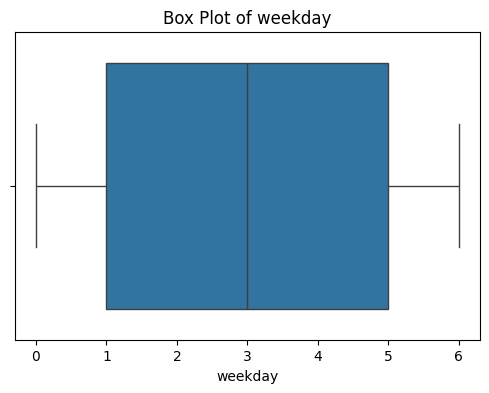

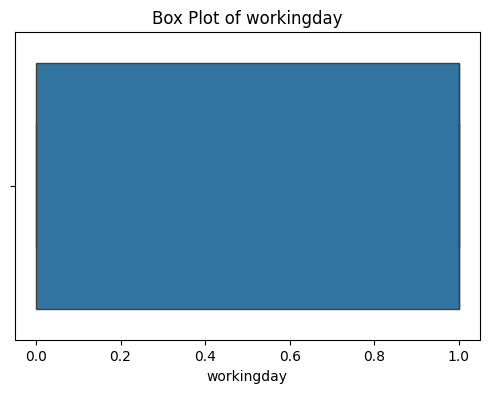

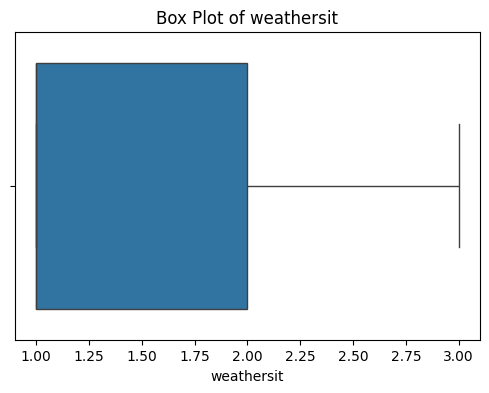

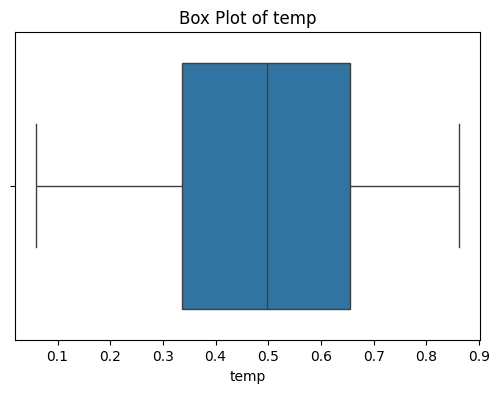

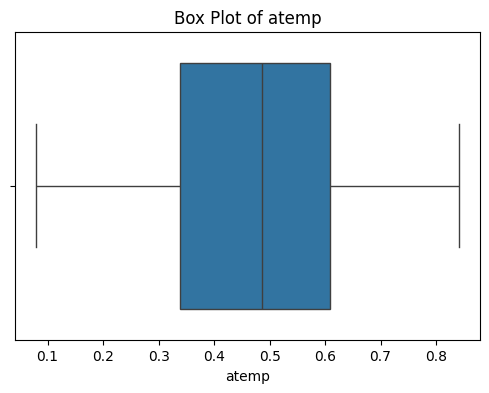

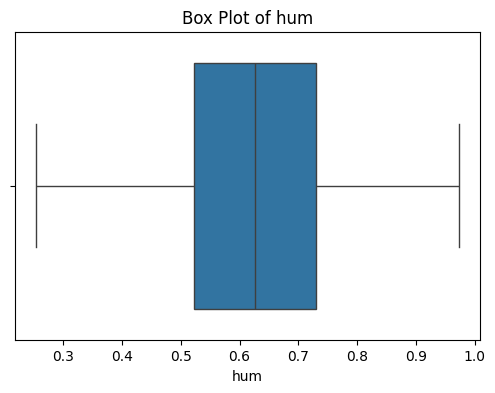

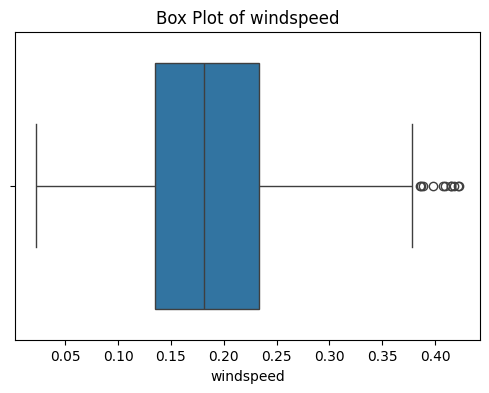

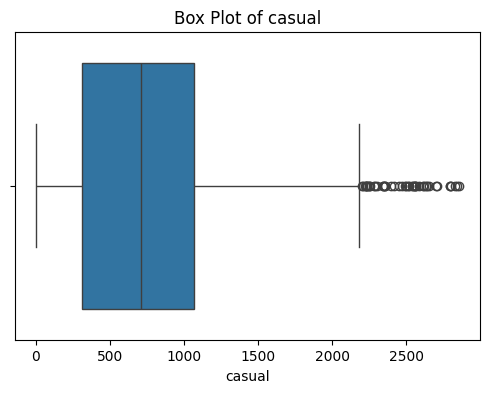

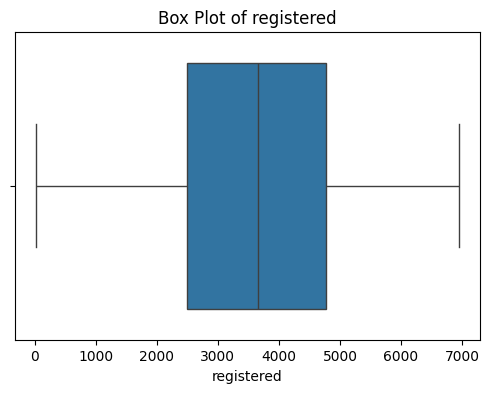

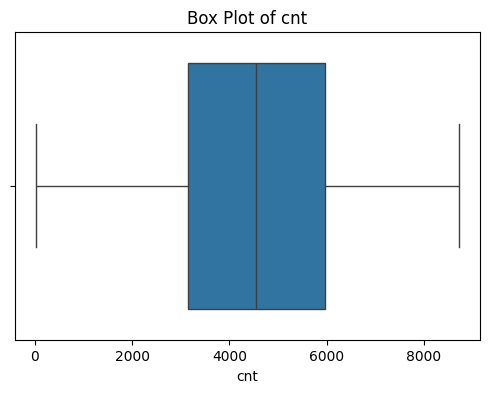

In [79]:
# Tentukan kolom-kolom numerik untuk dianalisis
numeric_columns = day_df.select_dtypes(include=['number']).columns

# Menampilkan box plot untuk setiap kolom numerik secara terpisah
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=day_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

Outlier selain dari kolom holiday telah diganti dengan median. Masih terdapat outlier pada dataset, namun saya akan biarkan saja agar tidak terlalu banyak perubahan yang terjadi pada dataset.

## Exploratory Data Analysis (EDA)

### Explore ...

In [80]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629352,0.189683,821.343365,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.139566,0.076036,641.799197,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.522291,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233087,1070.500000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.422275,2855.000000,6946.000000,8714.000000


<ipython-input-81-d6805ae10683>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = day_df.corr()


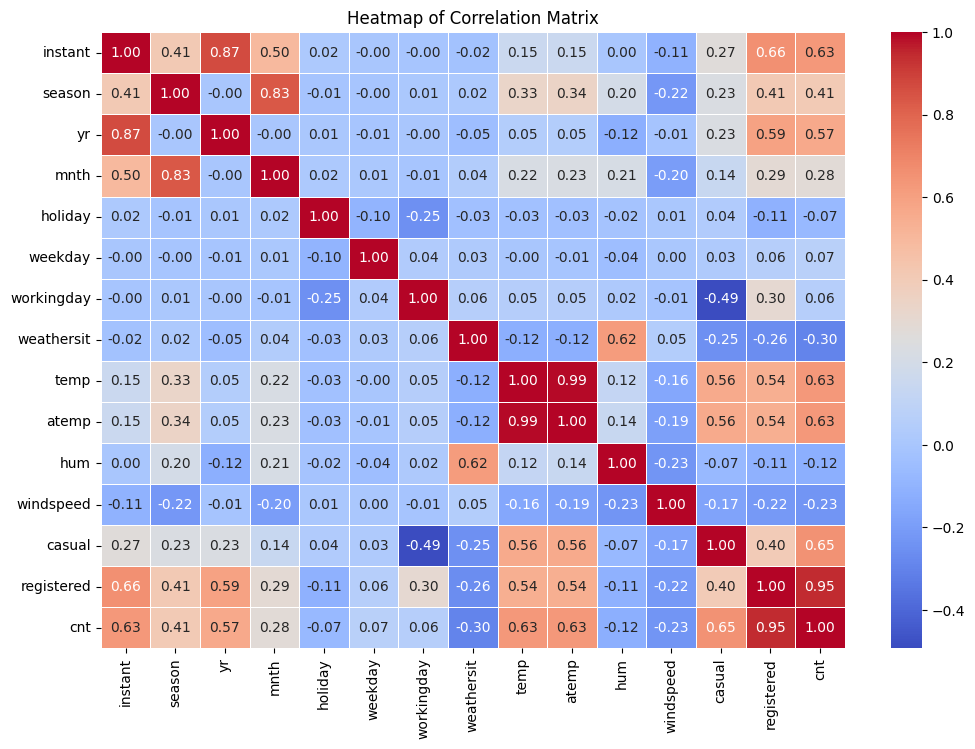

In [81]:
# Buat matriks korelasi
correlation_matrix = day_df.corr()

# Buat heatmap menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Pada heatmap korelasi diatas. dapat diketahui bahwa korelasi antar cnt(Total sepeda dirental) dengan workingday tidak terlalu berkolesi. sedangkan untuk cnt dengan weathersit terlihat memiliki korelasi -0.30 yang menandakan terdapat korelasi namun tidak terlalu besar.

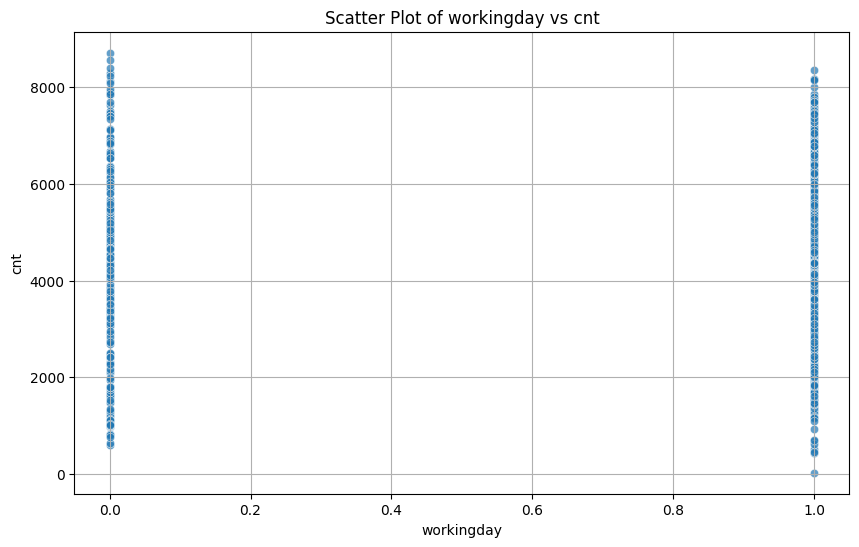

In [82]:
# Buat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x="workingday", y="cnt", data=day_df, alpha=0.7)
plt.title(f'Scatter Plot of {"workingday"} vs {"cnt"}')
plt.grid(True)
plt.show()

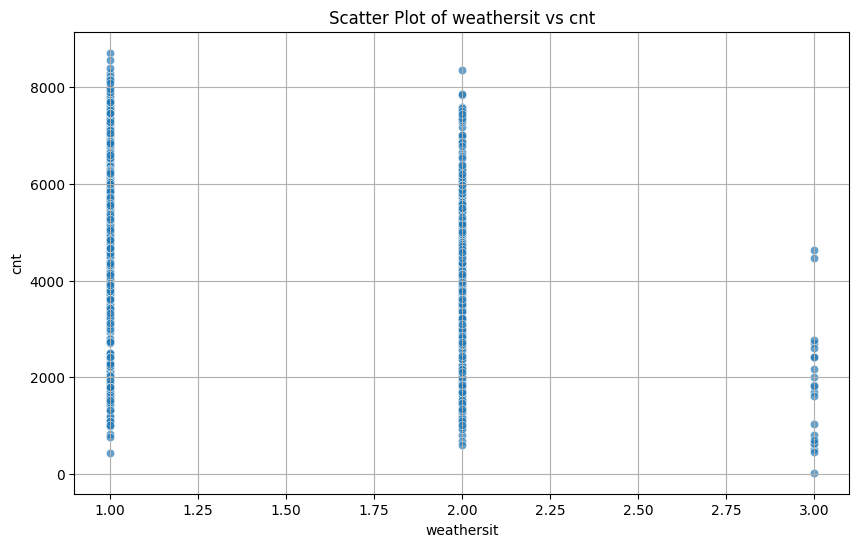

In [83]:
# Buat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x="weathersit", y="cnt", data=day_df, alpha=0.7)
plt.title(f'Scatter Plot of {"weathersit"} vs {"cnt"}')
plt.grid(True)
plt.show()

Untuk korelasi workingday dengan cnt sepertinya kurang tepat dikarekan kolom workingday hanya memiliki 2 nilai yang unik. Hal yang sama juga terjadi dengan weathersit yang hanya terdapat 3 nilai unik. Untuk lebih jelasnya akan kita cek pada tahap visualisasi dan analisis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah hari kerja berpengaruh terhadap jumlah orang yang merental sepeda harian

pada saat tahap EDA dengan melihat korelasi, diketahui korelasi yang didapatkan hampir nol, sehingga kita akan melihat perbandingan jumlah perental berdasarkan workingday dengan bar chart.

<ipython-input-84-b52029d87438>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=workingday_counts.index, y=workingday_counts.values, palette='pastel')


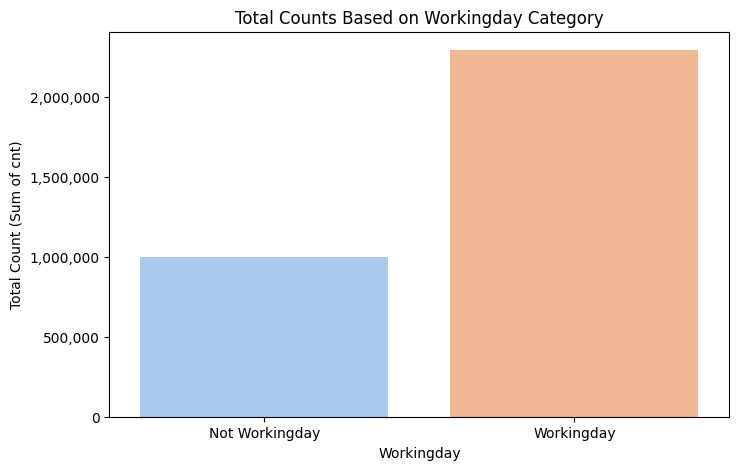

In [84]:
from matplotlib.ticker import FuncFormatter #untuk menghilangkan format angka
# Hitung jumlah total cnt untuk setiap kategori workingday
workingday_counts = day_df.groupby('workingday')['cnt'].sum()

# Buat bar chart menggunakan Seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=workingday_counts.index, y=workingday_counts.values, palette='pastel')

# Set formatter untuk sumbu y tanpa notasi ilmiah
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Total Counts Based on Workingday Category')
plt.xlabel('Workingday')
plt.ylabel('Total Count (Sum of cnt)')
plt.xticks(ticks=[0, 1], labels=['Not Workingday', 'Workingday'])
plt.show()

Dapat dilihat dengan menggunakan barchart, jumlah perental pada hari kerja mencapai 2.000.000 lebih. Angka ini untuk perentalan yang dilakukan dari tahun 2011 hingga 2012 artinya dalam dua tahun pada hari kerja terdapat 2.000.000 lebih perentalan sepeda yang dilakukan. sedangkan untuk hari yang tidak bekerja ataupun libur hanya terdapat sekitar 1.000.000 perental. 1/3 dari semua jumlah perental.

### Pertanyaan 2: Apakah cuaca berpengaruh terhadap jumlah orang yang merental sepeda harian?

<ipython-input-85-65b319a6e0db>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weathersit_counts.index, y=weathersit_counts.values, palette='pastel')


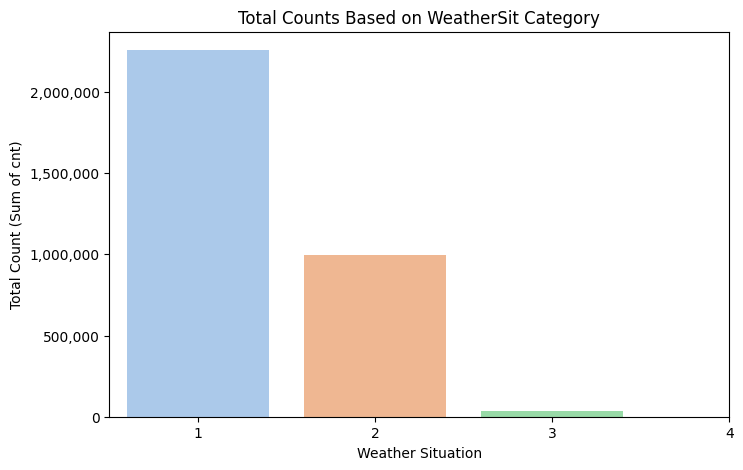

In [85]:
# Hitung jumlah total cnt untuk setiap kategori weathersit
weathersit_counts = day_df.groupby('weathersit')['cnt'].sum()

# Buat bar chart menggunakan Seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=weathersit_counts.index, y=weathersit_counts.values, palette='pastel')

# Set formatter untuk sumbu y tanpa notasi ilmiah
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Total Counts Based on WeatherSit Category')
plt.xlabel('Weather Situation')
plt.ylabel('Total Count (Sum of cnt)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['1', '2', '3', '4'])
plt.show()

Untuk penjelasan kategori cuaca adalah sebagai berikut:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- Ketika cuaca cerah (weathersit = 1) jumlah perentalnya lebih banyak dibanding weathersit 2 dan 3.
- Untuk cuaca berkabut dan berawan misalnya (weathersit = 2), jumlah total perentalnya hanya setengah dibandingkan ketika cuaca cerah.
- Untuk salju yang tidak terlalu parah, atau hujan yang tidak terlalu deras (weathersit = 3) memiliki total perental sepeda yang paling kecil hanya sekitar kurang dari 100.000.
- Untuk cuaca ekstrim (weathersit = 4) tidak ada sama sekali orang yang ingin merental sepeda dikondisi seperti itu.

## Conclusion

- Hari kerja berpengaruh terhadap jumlah orang yang merental sepeda harian, karena jumlah perental ketika hari kerja mencapai 2 kali lipat jumlah perental ketika bukan hari kerja
- Cuaca berpengaruh terhadap jumlah orang yang merental sepeda harian. Karena Jumlah perental harian ketika cuaca cerah mencapai 2 kali lipat jumalh perental harian ketika cuaca berkabut atau berawan. Sedangkan untuk cuaca bersalju atau hujan ringan, perental hariannya sangat sediti. Untuk cuaca di cuaca ekstrim, sama sekali tidak ada perental sepeda harian.

In [86]:
#menyimpan data yang telah dibersihkan
day_df.to_csv("all_data.csv", index=False)